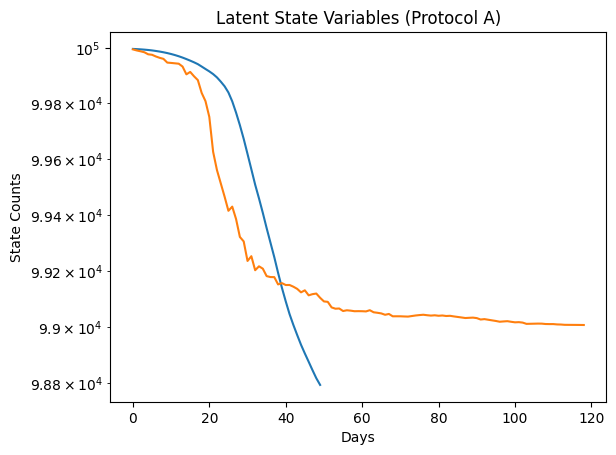

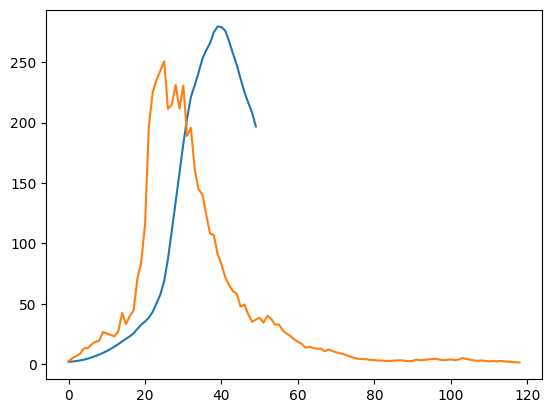

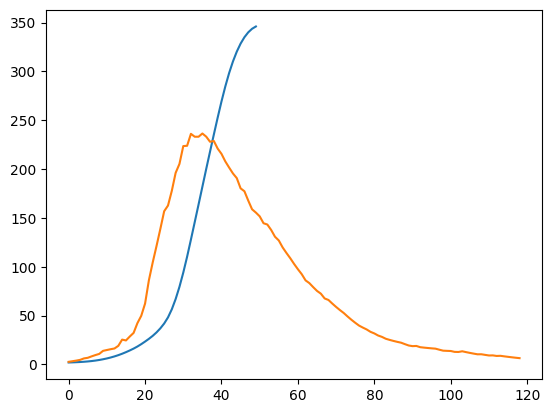

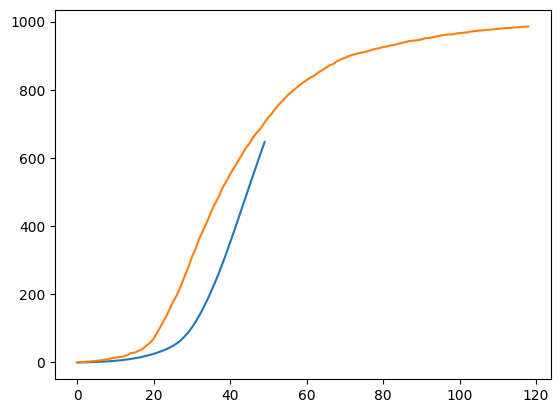

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


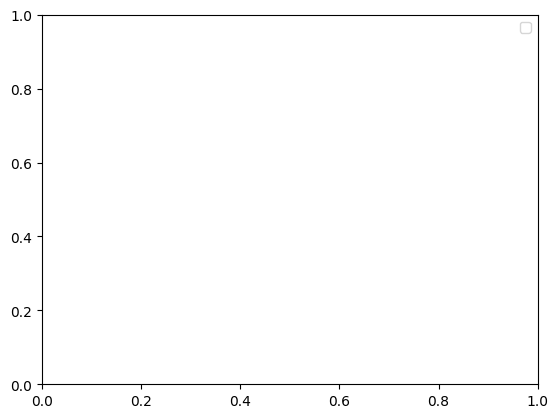

In [20]:
import numpy as np
from scipy.stats import nbinom
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sys
import pandas as pd

predicted_beta = pd.read_csv('../datasets/Out_prog3/out_logit-beta_trj_rnorm.csv').to_numpy()
predicted_beta = np.delete(predicted_beta,0,1)

observations = pd.read_csv('../datasets/calvetti_sim_data_protocol_A.csv').to_numpy()
observations = np.delete(observations,0,1)

estimated_state = pd.read_csv('../datasets/ESTIMATED_STATE.csv').to_numpy()
estimated_state = np.delete(estimated_state,0,1)

pf_beta = pd.read_csv('../datasets/average_beta.csv').to_numpy()
pf_beta = np.delete(pf_beta,0,1).squeeze()

def beta(t):
    return pf_beta[t]
    

def RHS(t,y,par): 
    S,E,I,R,_ = y
    dS = - par['beta'](int(t)) * ((E + par['q'] * I)/par['N_p']) * S
    dE = par['beta'](int(t)) * ((E + par['q'] * I)/par['N_p']) * S - par['eta']*E - par['gamma'] * E
    dI = par['eta'] * E - par['gamma'] * I - par['mu'] * I
    dR = par['gamma'] * E + par['gamma'] * I

    d_newI = par['eta'] * E

    return np.array([dS,dE,dI,dR,d_newI])


'''Model parameters'''
params = {'beta': beta,'eta':1/7,'gamma':1/14,'mu':0.004,'N_p':100_000, 'q':0.1}


t_span = [0,40]
y0 = np.concatenate((estimated_state[0],observations[0]))

'''Default solver is RK-45

Solves the ODE system for Protocol A, gamma = 1/14, eta = 1/7

'''
y0 = [99996,2,2,0,0]
sol = solve_ivp(fun=lambda t,y: RHS(t,y,params),t_span = t_span,y0 = y0,t_eval = np.linspace(0,40))

'''Plotting for the state variables'''

plt.yscale('log')
plt.xlabel('Days')
plt.ylabel('State Counts')
plt.title('Latent State Variables (Protocol A)')
labels = ['S','E','I','R']
for i in range(4):
    plt.plot(sol.y[i,:],label = labels[i])
    plt.plot(estimated_state[:,i])
    plt.show()
plt.legend()

